https://qiita.com/akinami/items/29a851c7051b1968b396

## PID制御とは
- 以下を組み合わせた制御方法
    - P制御(比例制御)
    - I制御(積分制御)
    - D制御(微分制御)

## P制御
現在角度$θ_{current}$と目標角度$θ_{goal}$の差に比例した操作量mを出力

$m = K_P e$

$K_P$: 比例ゲイン(P制御をどのくらい反映させるかを決定する定数)

$e = θ_{goal} - θ_{current}$: 偏差

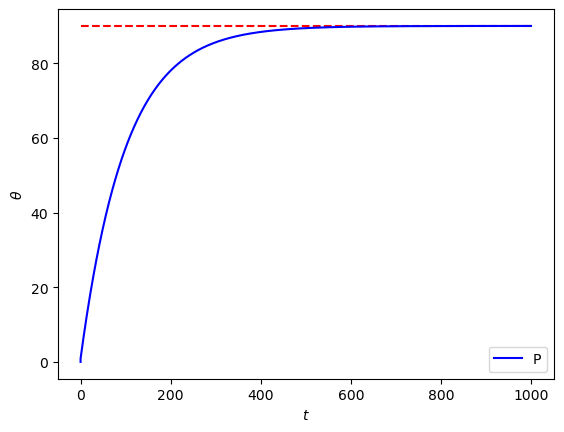

In [4]:
# 簡易的なシミュレーションのため、操作量mを現在角度θにそのまま足す
from matplotlib import pyplot as plt

def P(kp, theta_goal, theta_current):
    error = theta_goal - theta_current # 偏差
    m = kp * error # 操作量
    return m

kp = 0.01 # 比例ゲイン
theta_start = 0.0 # 初期角度
theta_goal = 90.0 # 目標角度
time_length = 1000 # 計測時刻
theta_current = theta_start # 現在角度
time_list = [0] # 時刻のリスト
theta_list = [theta_start] # 現在地のリスト

for time in range(time_length):
    m = P(kp, theta_goal, theta_current) # 操作量を算出
    theta_current += m # 現在角度に操作量を足す
    time_list.append(time)
    theta_list.append(theta_current)

plt.hlines([theta_goal], 0, time_length, "red", linestyles='dashed')
plt.plot(time_list, theta_list, label="P", color="blue")
plt.xlabel(r'$t$') 
plt.ylabel(r'$\theta$')
plt.legend(loc='lower right')
plt.show()

## PI制御
偏差を積分した結果を使用

定常偏差(目標に到達する直前で収束してしまう現象)対策

$m = K_P e + K_I\int_{}^{}e dt$

$K_P$: 比例ゲイン(P制御をどのくらい反映させるかを決定する定数)

$K_I$: 積分ゲイン(I制御をどのくらい反映させるかを決定する定数)

$e = θ_{goal} - θ_{current}$: 偏差

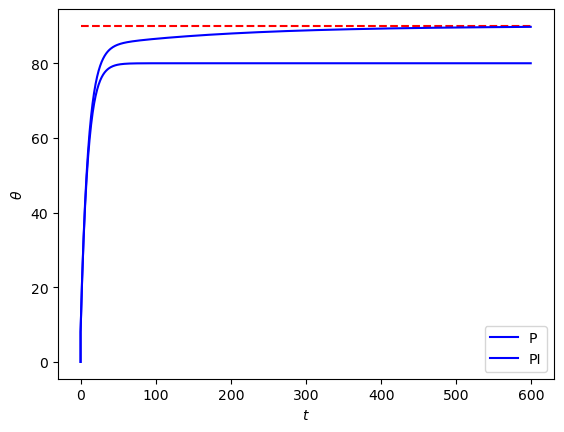

In [12]:
from matplotlib import pyplot as plt

from matplotlib import pyplot as plt

def P(kp, theta_goal, theta_current):
    error = theta_goal - theta_current # 偏差
    m = kp * error # 操作量
    return m

kp = 0.1 # 比例ゲイン
theta_start = 0.0 # 初期角度
theta_goal = 90.0 # 目標角度
time_length = 600 # 計測時刻
offset = 1.0 # 追加: 定常偏差
theta_current = theta_start # 現在角度
time_list = [0] # 時刻のリスト
theta_list = [theta_start] # 現在地のリスト

for time in range(time_length):
    m = P(kp, theta_goal, theta_current) # 操作量を算出
    theta_current += m # 現在角度に操作量を足す
    theta_current -= offset # 定常偏差分を引く
    time_list.append(time)
    theta_list.append(theta_current)

plt.hlines([theta_goal], 0, time_length, "red", linestyles='dashed')
plt.plot(time_list, theta_list, label="P", color="blue")

def PI(kp, ki, theta_goal, theta_current, error_sum):
    error = theta_goal - theta_current # 偏差
    error_sum += error # 追加: 偏差の総和（積分）
    m = (kp * error) + (ki * error_sum) # 操作量
    return m, error_sum

ki = 0.0005 # 積分ゲイン
error_sum = 0.0 # 偏差の総和（積分）

# P制御時の数値を初期化
theta_start = 0.0; theta_current = theta_start; time_list = [0]; theta_list = [theta_start]

for time in range(time_length):
    m_val, error_sum = PI(kp, ki, theta_goal, theta_current, error_sum) # 操作量を算出
    theta_current = theta_current + m_val # 現在角度に操作量を足す
    theta_current -= offset # 定常偏差分を引く
    time_list.append(time)
    theta_list.append(theta_current)

plt.plot(time_list, theta_list, label="PI", color="blue")
plt.xlabel(r'$t$') 
plt.ylabel(r'$\theta$') 
plt.legend(loc='lower right')
plt.show()

## PID制御
微分をすることで，極端な変化を抑制する

オーバーシュート(操作量が大きすぎて目標角度をとおりすぎてしまう現象)対策

$m = K_P e + K_I\int_{}^{}e dt + K_D \frac{d}{dt} e$

$K_P$: 比例ゲイン(P制御をどのくらい反映させるかを決定する定数)

$K_I$: 積分ゲイン(I制御をどのくらい反映させるかを決定する定数)

$K_D$: 微分ゲイン(D制御をどのくらい反映させるかを決定する定数)

$e = θ_{goal} - θ_{current}$: 偏差

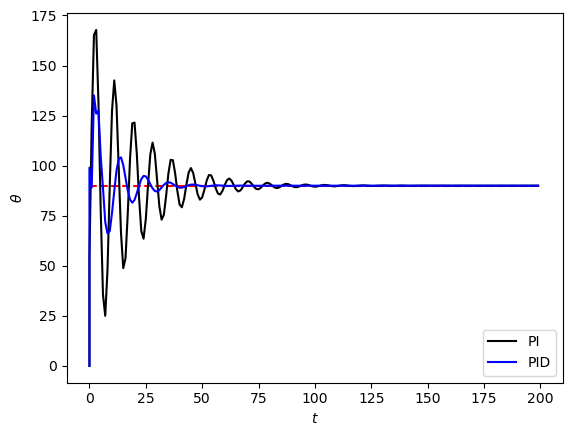

In [14]:
from matplotlib import pyplot as plt

def PI(kp, ki, theta_goal, theta_current, error_sum):
    error = theta_goal - theta_current# 偏差
    error_sum += error # 偏差の総和（積分）
    m = (kp * error) + (ki * error_sum) # 操作量
    return m, error_sum

kp = 0.1 # 比例ゲイン
ki = 0.5 # 積分ゲイン(値を大きくして、意図的に振動を発生させている)
theta_start = 0.0 # 初期角度
theta_goal = 90.0 # 目標角度
time_length = 200 # 計測時刻
theta_current = theta_start # 現在角度
error_sum = 0.0 # 偏差の総和（積分）
time_list = [0] # 時刻のリスト
theta_list = [theta_start] # 現在地のリスト

for time in range(time_length):
    m, error_sum = PI(kp, ki, theta_goal, theta_current, error_sum) # 操作量を算出
    theta_current += m # 現在角度に操作量を足す
    time_list.append(time)
    theta_list.append(theta_current)

plt.hlines([theta_goal], 0, time_length, "red", linestyles='dashed')
plt.plot(time_list, theta_list, label="PI", color="black")

def PID(kp, ki, kd, theta_goal, theta_current, error_sum, error_pre):
    error = theta_goal - theta_current# 偏差
    error_sum += error # 偏差の総和（積分）
    error_diff = error-error_pre # 追加： 1時刻前の偏差と現在の偏差の差分（微分）を計算
    m = (kp * error) + (ki * error_sum) + (kd*error_diff) # 操作量
    return m, error_sum, error

kd = 0.5 # 微分ゲイン
error_pre = 0.0 # 1時刻前の偏差

# PI制御の時の数値を初期化
theta_start = 0.0; theta_current = theta_start; error_sum = 0.0; time_list = [0]; theta_list = [theta_start] 

for time in range(time_length):
    m, error_sum, error = PID(kp, ki, kd, theta_goal, theta_current, error_sum, error_pre) # 操作量
    theta_current += m # 現在角度に操作量を足す
    error_pre = error # 一時刻前の偏差を保存
    time_list.append(time)
    theta_list.append(theta_current)

plt.plot(time_list, theta_list, label="PID", color="blue")
plt.xlabel(r'$t$') 
plt.ylabel(r'$\theta$') 
plt.legend(loc='lower right')
plt.show()